<a href="https://colab.research.google.com/github/rafidddeshmukh/Regression-Bike_Sharing_Demand_Prediction/blob/main/Regression_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

A Machine Learning regression predictive model for bike sharing demand prediction. A bike-sharing system provides people with a sustainable mode of transportation and has beneficial effects for both the environment and the user. In recent days, Pubic rental bike sharing is becoming popular because of is increased comfortableness and environmental sustainability. Data used include Seoul Bike and Capital Bikeshare program data. Data have weather data associated with it for each hour. For the dataset, we are using linear regression model were train with optimize hyperparameters using a repeated cross validation approach and testing set is used for evaluation. Multiple evaluation indices such as R2 , Root Mean Square error are use to measure the prediction performance of the regression models. The performance of the model is vary with the time interval used in transforming data.

# **GitHub Link -**

https://github.com/rafidddeshmukh/Regression-Bike_Sharing_Demand_Prediction

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

The main objective is to make predictive model, which could help them in redicting the bike demands proactively. This will help them in stable supply of bike wherever needed.


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [227]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm


### Dataset Loading

In [228]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [229]:
# Load Dataset

#dateset file path
path = "/content/drive/MyDrive/Colab Notebooks/Almabeter/ML\
/Linear Regression/project/Regression-Bike_sharing_Demand_prediction/"

#read csv file
bike_df =pd.read_csv(path + "SeoulBikeData.csv", encoding= 'unicode_escape',
                     parse_dates=[0])


### Dataset First View

In [230]:
# Dataset First Look
bike_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-01-12                254     0             -5.2           37   
1 2017-01-12                204     1             -5.5           38   
2 2017-01-12                173     2             -6.0           39   
3 2017-01-12                107     3             -6.2           40   
4 2017-01-12                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [231]:
bike_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

### Dataset Rows & Columns count

In [232]:
# Dataset Rows & Columns count
bike_df.shape

(8760, 14)

### Dataset Information

In [233]:
# Dataset Info
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

#### Duplicate Values

In [234]:
# Dataset Duplicate Value Count
len(bike_df[bike_df.duplicated()])

0

#### Missing Values/Null Values

In [235]:
# Missing Values/Null Values Count
bike_df.isnull().sum().sort_values(ascending=False)[:5]

Date                 0
Rented Bike Count    0
Hour                 0
Temperature(°C)      0
Humidity(%)          0
dtype: int64

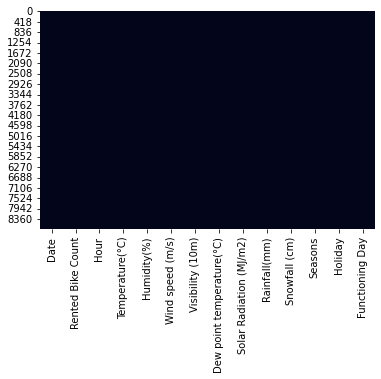

In [236]:
# Visualizing the missing values
sns.heatmap(bike_df.isnull(), cbar=False,)

### What did you know about your dataset?


The dataset was retrieved from UCI Machine Repository and contains the number of public bicycles. It is composed of 14 attributes with 8760 instances.

Each 24 instances represent one day in a year. The target is the
number of bicycles rented per hour.

There are no mising values and duplicate values in this dataset.

## ***2. Understanding Your Variables***

In [237]:
# Dataset Columns
bike_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [238]:
# Dataset Describe
bike_df.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count                  8760        8760.000000  8760.000000      8760.000000   
unique                  365                NaN          NaN              NaN   
top     2017-01-12 00:00:00                NaN          NaN              NaN   
freq                     24                NaN          NaN              NaN   
first   2017-01-12 00:00:00                NaN          NaN              NaN   
last    2018-12-11 00:00:00                NaN          NaN              NaN   
mean                    NaN         704.602055    11.500000        12.882922   
std                     NaN         644.997468     6.922582        11.944825   
min                     NaN           0.000000     0.000000       -17.800000   
25%                     NaN         191.000000     5.750000         3.500000   
50%                     NaN         504.500000    11.500000        13.700000   
75%                     NaN        1065.250000    17.250000        22.500000   
max                     NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
first           NaN               NaN               NaN   
last            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
first                         NaN                      NaN           NaN   
last                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
first             NaN     NaN         NaN             NaN  
last              NaN     NaN         NaN             NaN  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description 

Rented Bike count - Count of bikes rented at each hour

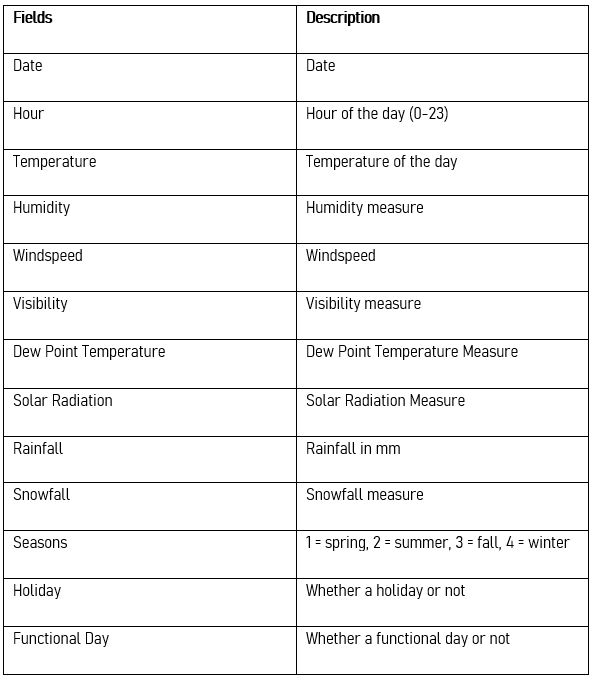

### Check Unique Values for each variable.

In [239]:
# Check Unique Values for each variable.
bike_df.nunique().sort_values()

Holiday                         2
Functioning Day                 2
Seasons                         4
Hour                           24
Snowfall (cm)                  51
Rainfall(mm)                   61
Wind speed (m/s)               65
Humidity(%)                    90
Solar Radiation (MJ/m2)       345
Date                          365
Temperature(°C)               546
Dew point temperature(°C)     556
Visibility (10m)             1789
Rented Bike Count            2166
dtype: int64

## 3. ***Data Wrangling***

Data types are an important aspect of 
statistical analysis, which needs to be 
understood to correctly apply statistical 
methods to your data.


During the data collection phase, the 
researcher may collect both numerical and 
categorical data when investigating to 
explore different perspectives. However, one 
needs to understand the differences between 
these two data types to properly use it in 
research



### Data Wrangling Code

In [240]:
#copy data
df = bike_df.copy()

In [241]:
# extracting day,month, day of week and weekdays/weekend from date column


df['Date']=pd.to_datetime(df['Date'])
df['month'] = df['Date'].apply(lambda x : x.month)
df['day_of_week'] = df['Date'].dt.day_name()
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','day_of_week'],axis=1)
     

In [242]:
# Write your code to make your dataset analysis ready.

#seprating numerical feartures

numerical_features = df.describe().columns

In [243]:
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'month',
       'weekdays_weekend'],
      dtype='object')

In [244]:
df[numerical_features].head()

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254     0             -5.2           37               2.2   
1                204     1             -5.5           38               0.8   
2                173     2             -6.0           39               1.0   
3                107     3             -6.2           40               0.9   
4                 78     4             -6.0           36               2.3   

   Visibility (10m)  Dew point temperature(°C)  Solar Radiation (MJ/m2)  \
0              2000                      -17.6                      0.0   
1              2000                      -17.6                      0.0   
2              2000                      -17.7                      0.0   
3              2000                      -17.6                      0.0   
4              2000                      -18.6                      0.0   

   Rainfall(mm)  Snowfall (cm)  month  weekdays_weekend  
0           0.0            0.0      1                 0  
1           0.0            0.0      1                 0  
2           0.0            0.0      1                 0  
3           0.0            0.0      1                 0  
4           0.0            0.0      1                 0

In [245]:

#separating carogorical features
cat_features = bike_df.describe(include=['object', 'category']).columns
cat_features

Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')

In [246]:
df[cat_features].head()

Seasons     Holiday Functioning Day
0  Winter  No Holiday             Yes
1  Winter  No Holiday             Yes
2  Winter  No Holiday             Yes
3  Winter  No Holiday             Yes
4  Winter  No Holiday             Yes

### What all manipulations have you done and insights you found?


We treat numeric and categorical variables
differently in Data Wrangling. So, we should 
always make at least two sets of data: one 
contains numeric variables and other contains 
categorical variables.


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

##**EXPLORATORY DATA ANALYSIS**
---
In statistics, exploratory data analysis (EDA)
is an approach of analyzing data sets to 
summarize their main characteristics, often 
using statistical graphics and other data 
visualization methods. A statistical model can 
be used or not, but primarily EDA is for 
seeing what the data can tell us beyond the 
formal modeling and thereby contrasts 
traditional hypothesis testing. EDA is helped 
us figuring out various aspects and 
relationships among the target and the 
independent variables.

#### Chart - 1

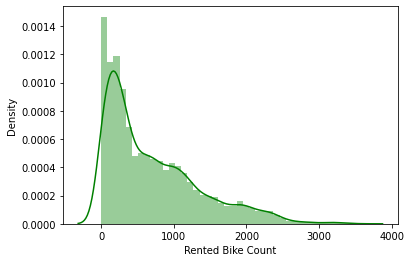

In [247]:
# Chart - 1 visualization code
# Dependent variable "Rented Bike Count"
sns.distplot(df['Rented Bike Count'], color='green')

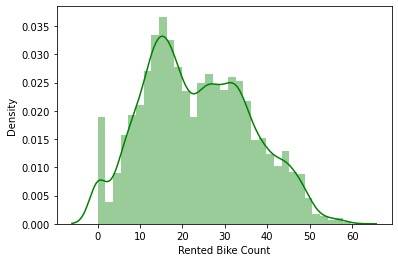

In [248]:
#Square root tranformation
sns.distplot(np.sqrt(df['Rented Bike Count']), color='green')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

<function matplotlib.pyplot.show(*args, **kw)>

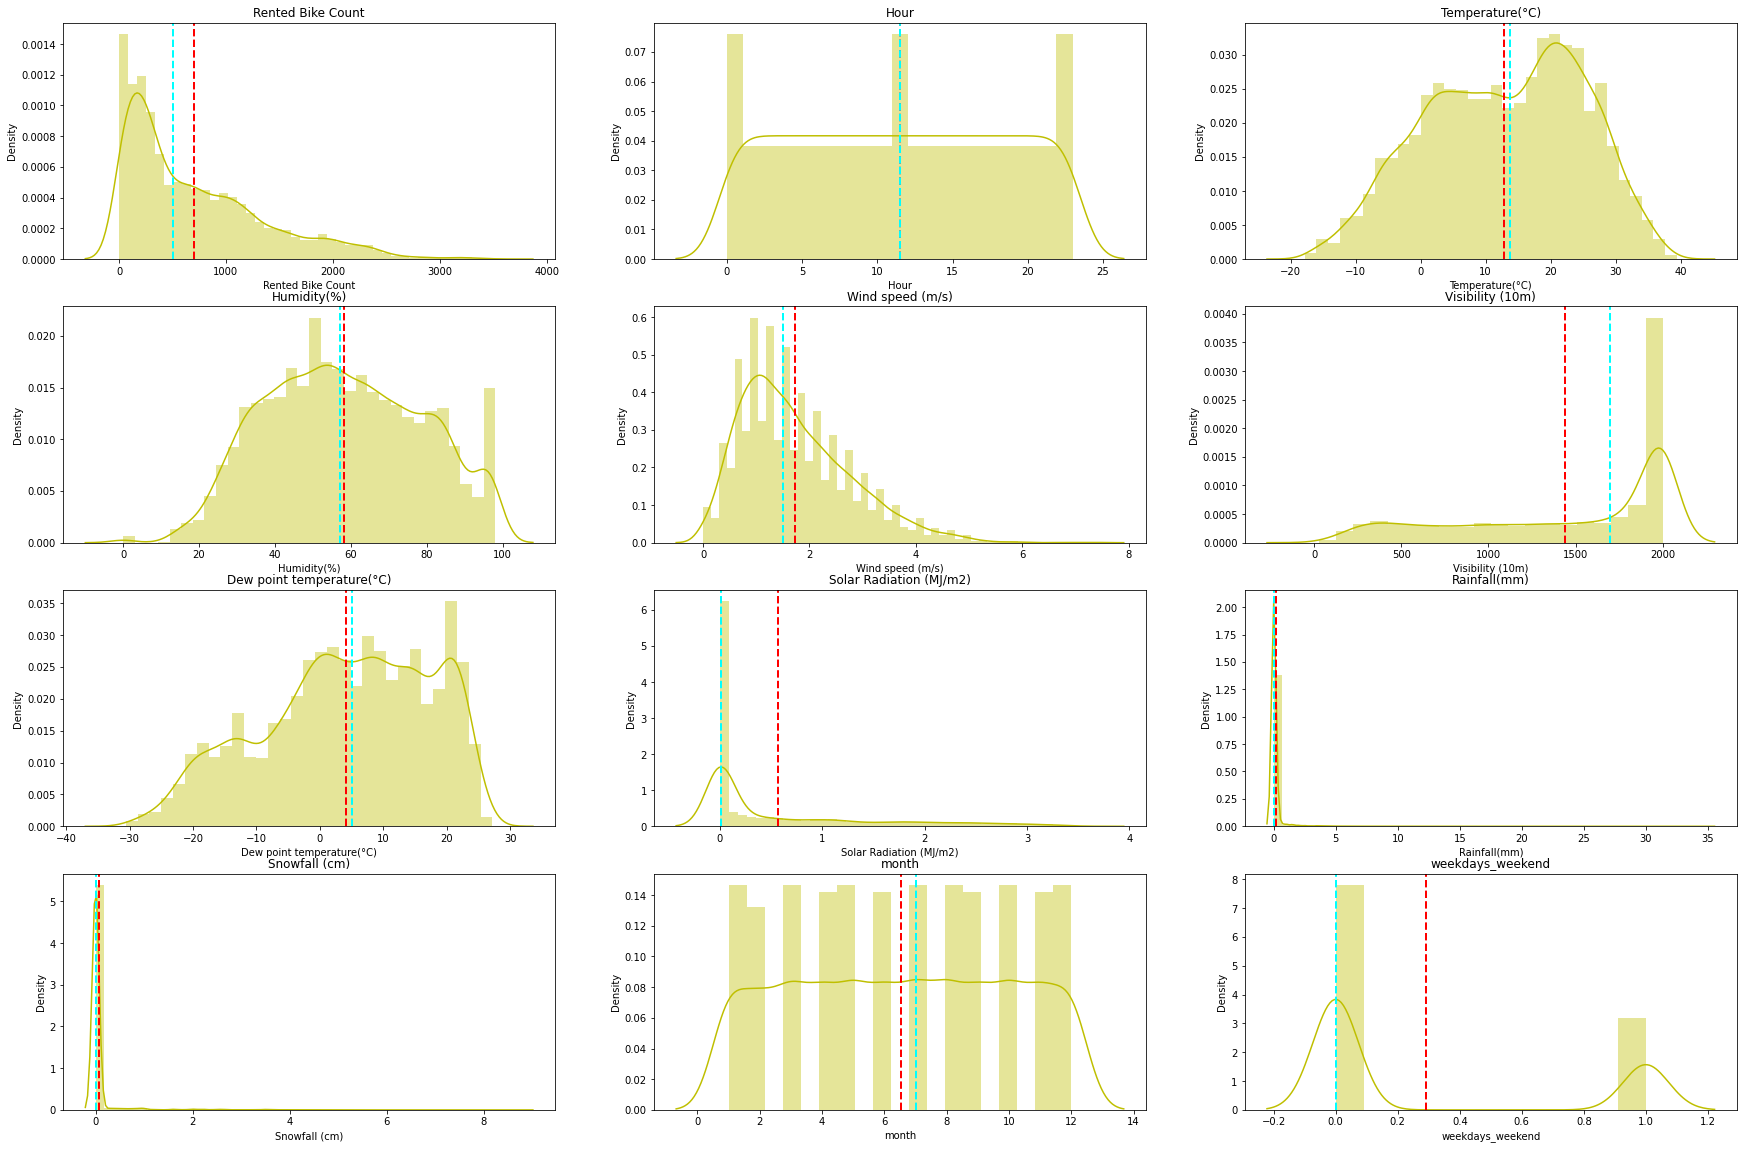

In [249]:
# Chart - 2 visualization code
## plot bar plot for each numerical features count

fig, axes = plt.subplots(4, 3, figsize=(30, 20))

for i, col in enumerate(numerical_features):
  ax = axes[i//3,i%3]
  #feature  = bike_df[col]
  sns.distplot(df[col], color='y',ax=ax)
  ax.axvline(df[col].mean(), color= 'red',linestyle='dashed', linewidth=2)
  ax.axvline(df[col].median(), color = 'cyan', linestyle = 'dashed', 
             linewidth=2)

  ax.set_title(col)
plt.show



##### 1. Why did you pick the specific chart?

We plot numerical data to analysis data 
distribution.

##### 2. What is/are the insight(s) found from the chart?

Here we can see some attributes are normally distributed but some are positively or negatively skewed.

**Right/Positive Skewed Distribution**: *Mode < Median < Mean*:

*  Rented Bike Count,
*  Wind Speed(m/s), 
*  Solar Radiation(MJ/m2)

**No Skew**: *Mean = Median = Mode*:
*  Hour
*  Temperature
*  Humidity(%)
*  Rainfall(mm)
*  Snowfall(cm)


**Left/Negative Skewed Distribution**: *Mean 
< Median < Mode*:

*  visibility(10m)







##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<function matplotlib.pyplot.show(*args, **kw)>

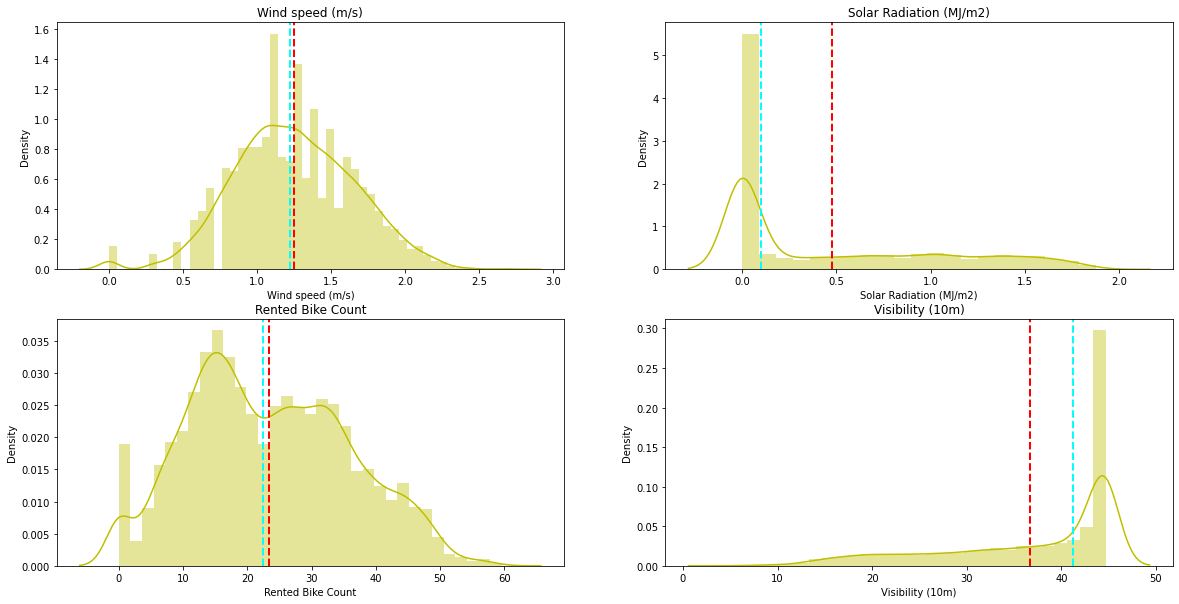

In [250]:
# Chart - 3 visualization code
#square root transfoemation Transfoemation for positive and negative skewed distribution
num_postive_skewed = ['Wind speed (m/s)','Solar Radiation (MJ/m2)',
                      'Rented Bike Count' ,'Visibility (10m)']
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

for i, col in enumerate(num_postive_skewed):

  #feature  = bike_df[col]
  ax = axes[i//2, i%2]
  sns.distplot(np.sqrt(df[col]),ax=ax, color='y')
  ax.axvline(np.sqrt(df[col]).mean(), color= 'red',linestyle='dashed', 
             linewidth=2)
  ax.axvline(np.sqrt(df[col]).median(), color = 'cyan', 
             linestyle = 'dashed', linewidth=2)

  ax.set_title(col)

  
plt.show



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

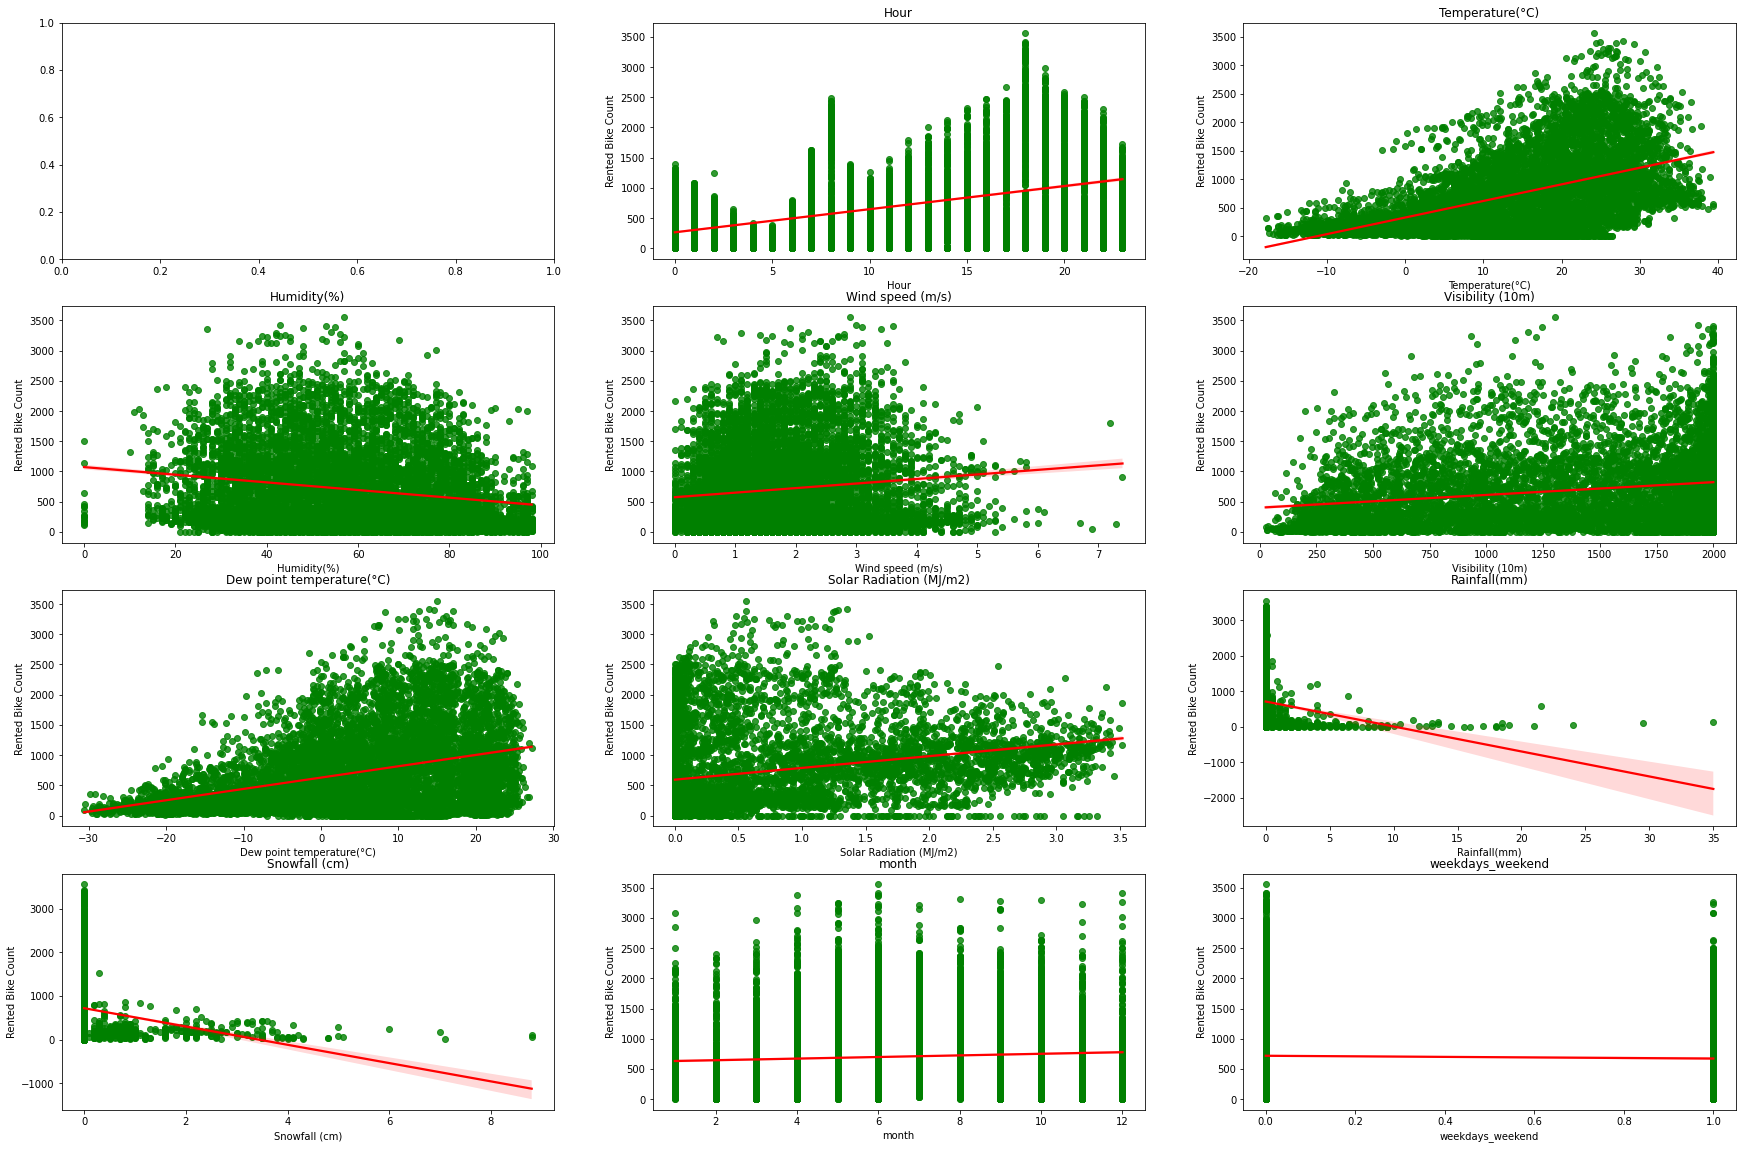

In [251]:
# Chart - 4 visualization code
# ploting Regression plot of each columns of dataset v/s rented bike count columns

## realtion between selling price and other features


fig, axes = plt.subplots(4, 3, figsize=(30, 20))

for i, col in enumerate(numerical_features):
  if col == 'Rented Bike Count':
    pass
  else:
    # i//6 and i%6 will give you row and col index respectively.
    x_axis = df[col]
    y_axis = df['Rented Bike Count']
    ax = axes[i//3, i%3]
    sns.regplot(x=x_axis, y=y_axis, ax=ax,color='green',
                line_kws={'color':'red'})
    ax.set_title(col)
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<function matplotlib.pyplot.show(*args, **kw)>

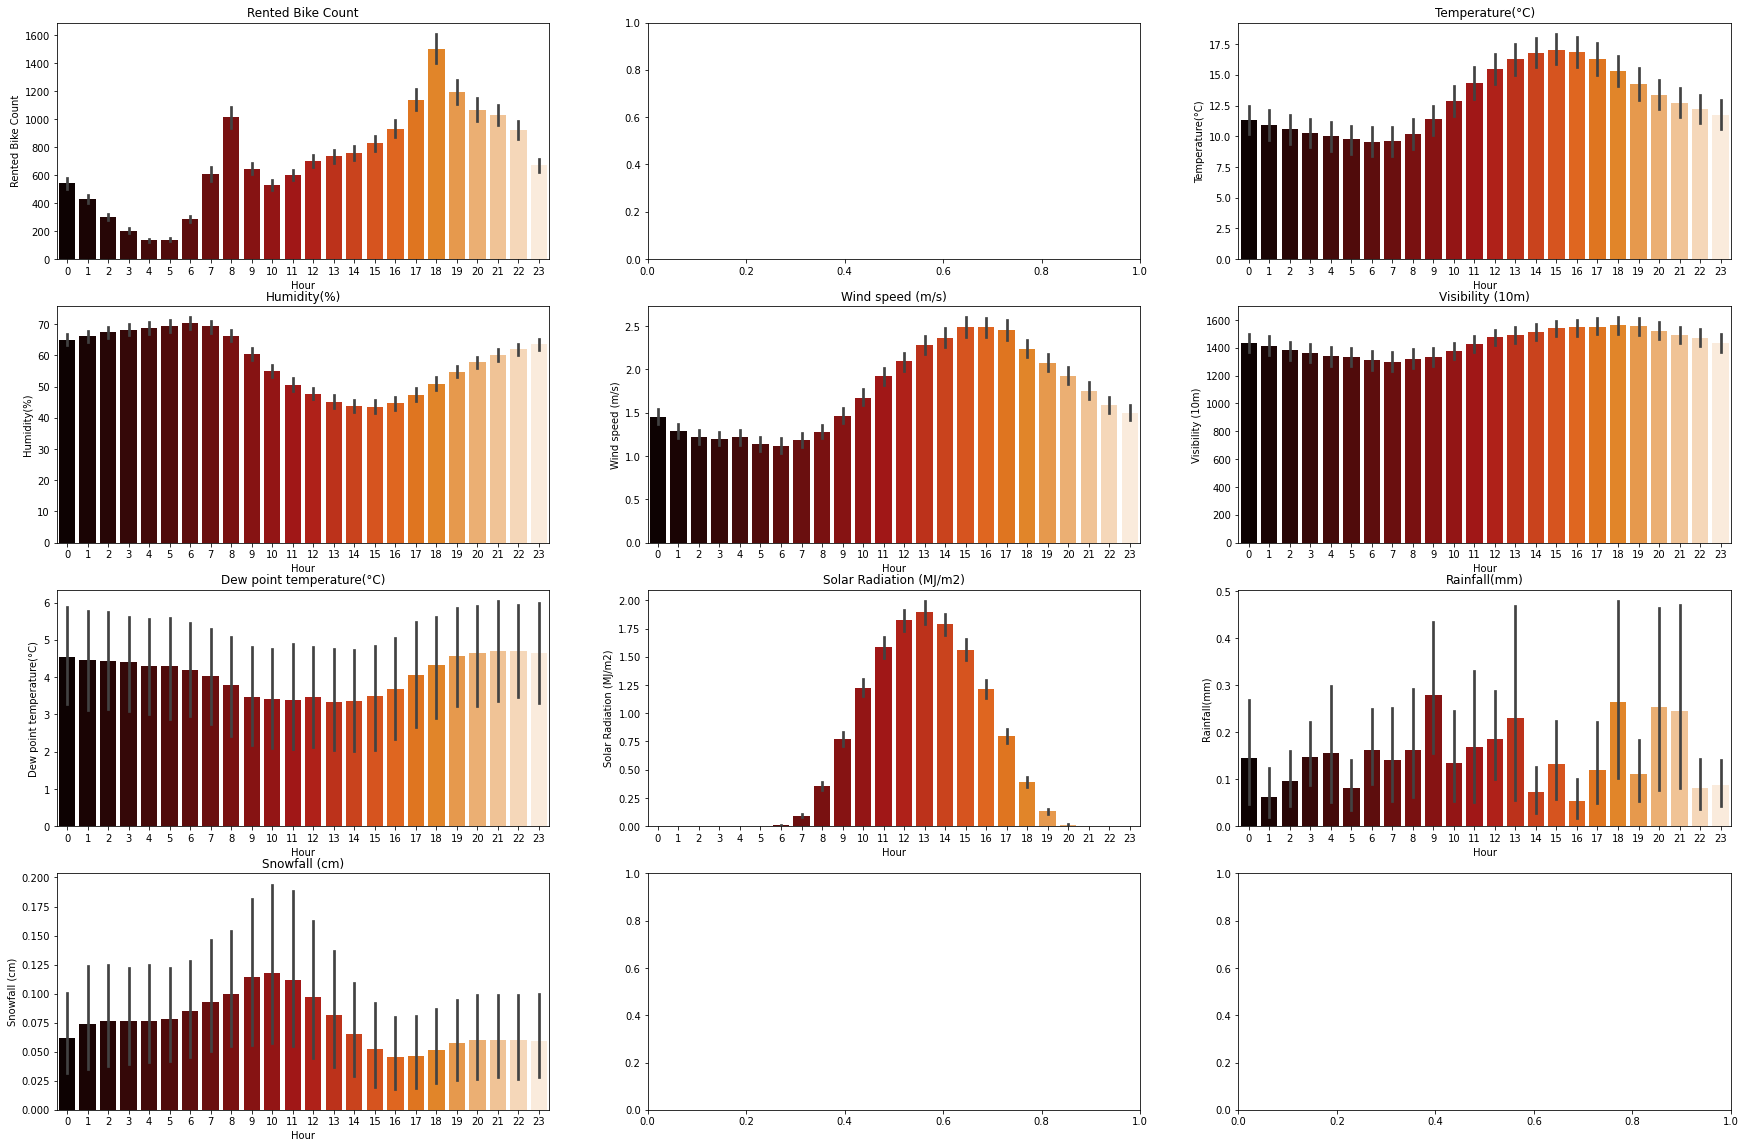

In [252]:
# Chart - 5 visualization code
#Here we can look at each plot and see the hours wise data distribution.

fig, axes = plt.subplots(4, 3, figsize=(30, 20))
for i, col in enumerate(numerical_features):
  if col in ['Hour','month','weekdays_weekend']:
    continue
  else:
    ax = axes[i//3,i%3]
    sns.barplot(y=df[col],x=df['Hour'] ,palette='gist_heat',ax=ax)

  ax.set_title(col)
plt.show


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

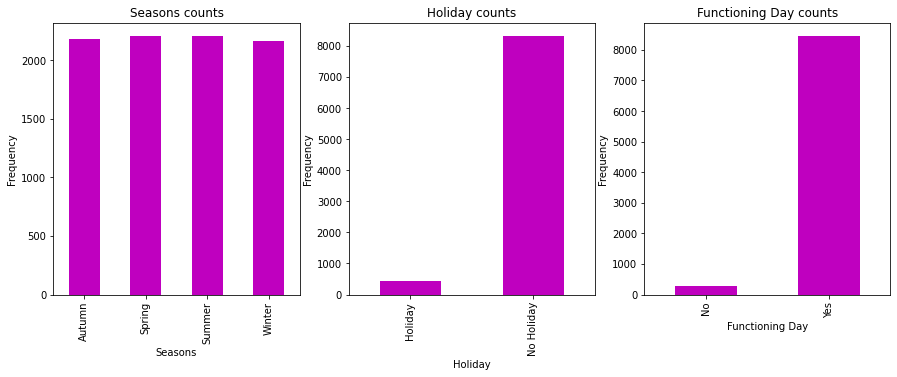

In [253]:
# Chart - 6 visualization code
#categorical features
fig, axes = plt.subplots(1,3, figsize=(15, 5))
i=0
for col in cat_features:
    counts = df[col].value_counts().sort_index()
    ax = axes[i]
    counts.plot.bar(ax = ax, color='m')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
    i += 1
plt.show()



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

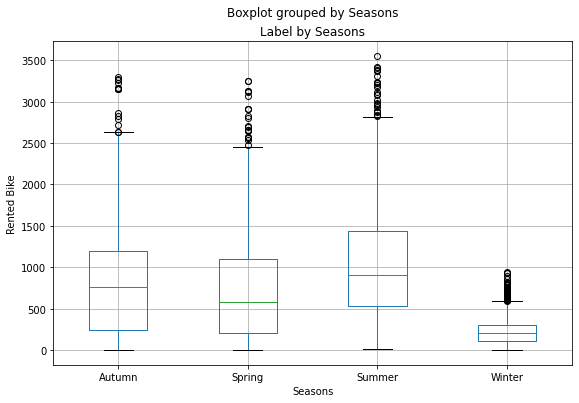

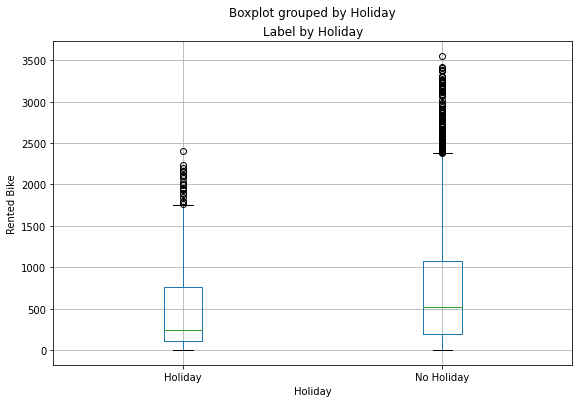

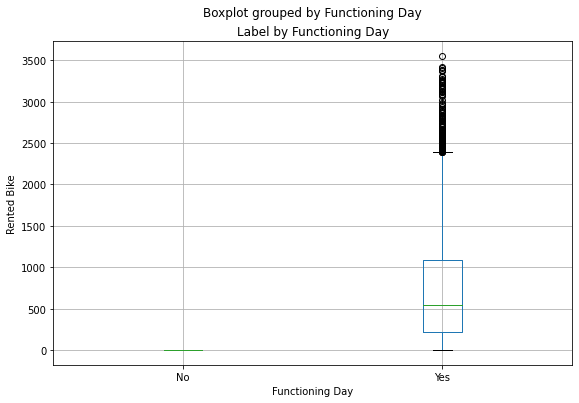

In [254]:
# Chart - 7 visualization code
#boxplot for categorical value

for col in cat_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rented Bike Count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike")
plt.show()

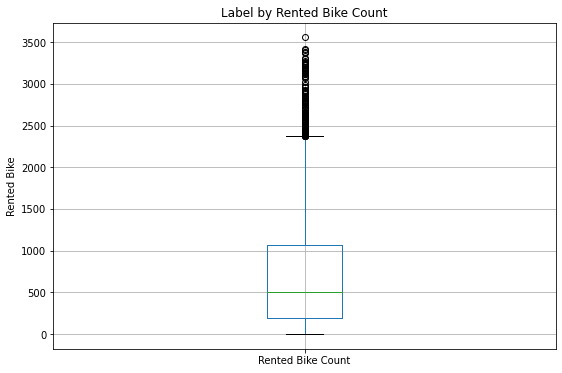

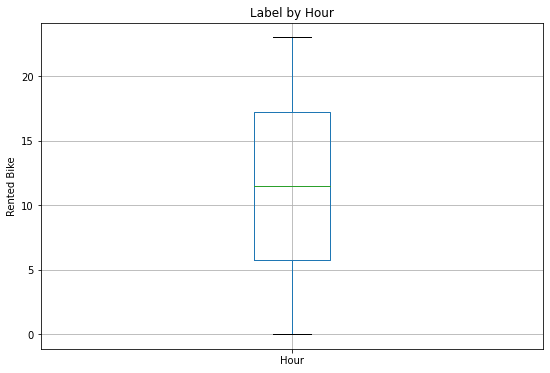

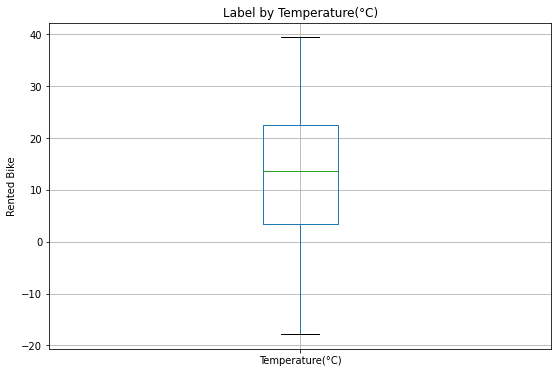

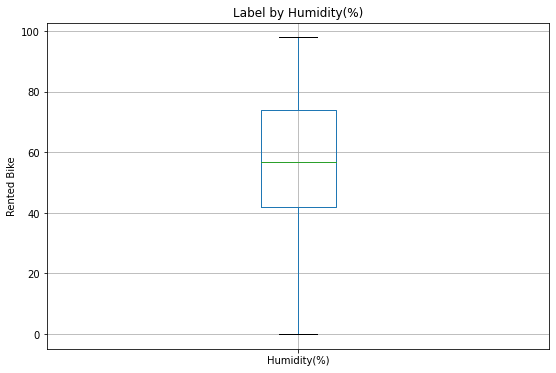

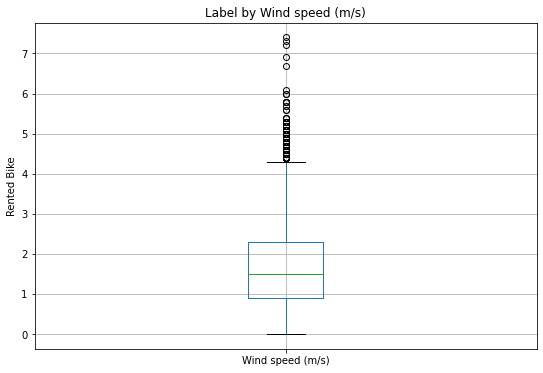

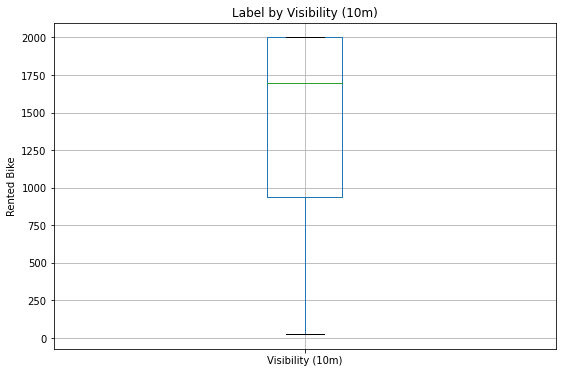

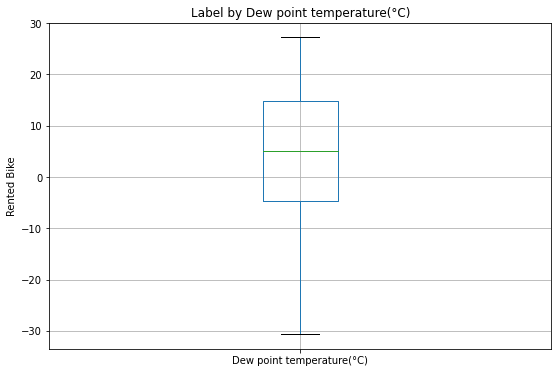

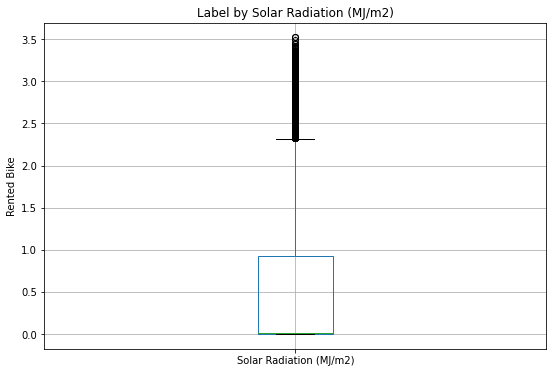

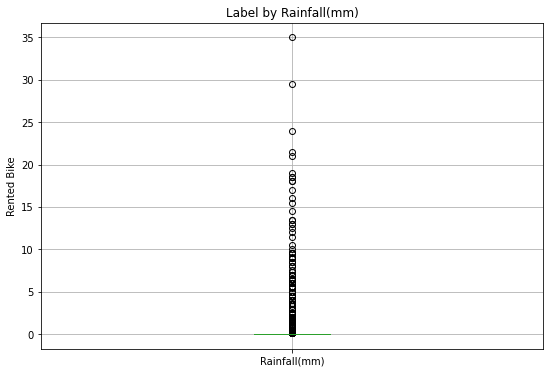

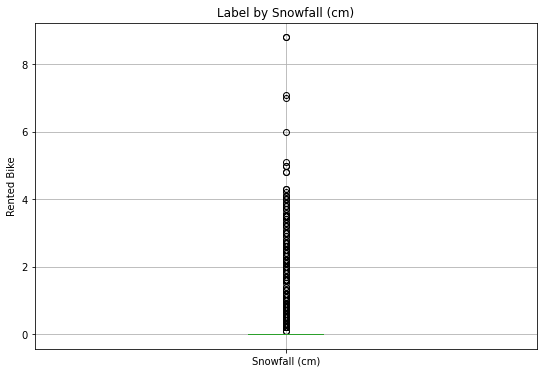

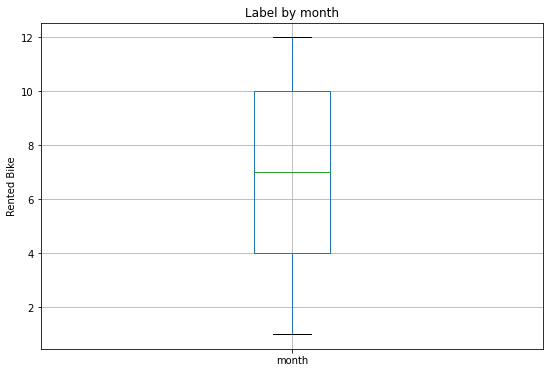

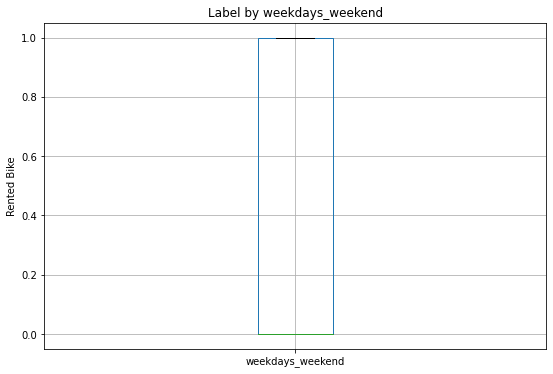

In [255]:
for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column =col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike")
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

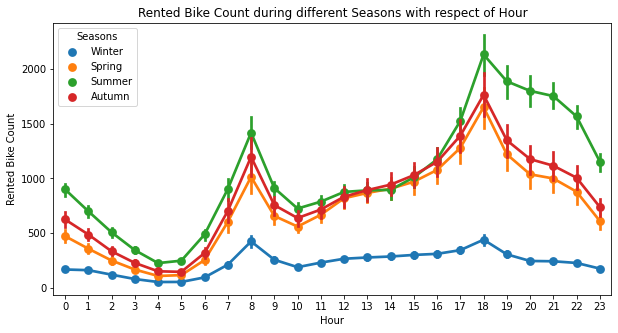

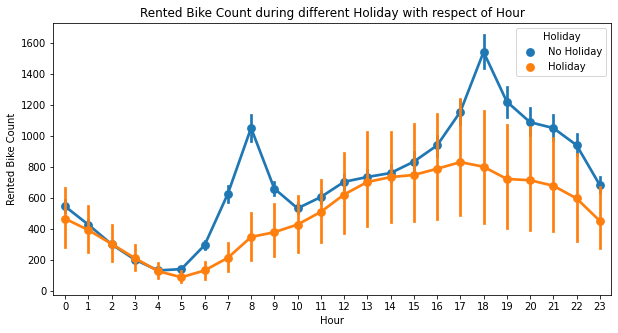

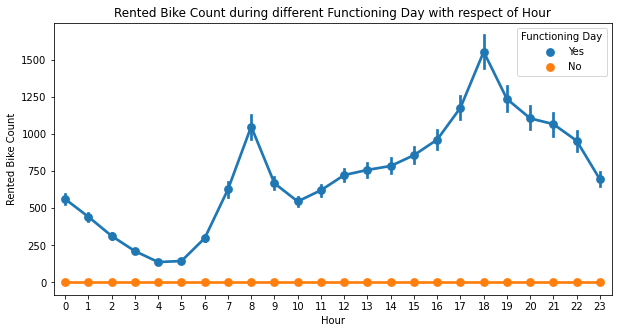

Text(0.5, 1.0, "Rented Bike Count during different 'weekdays_weekend' with respect of Hour")

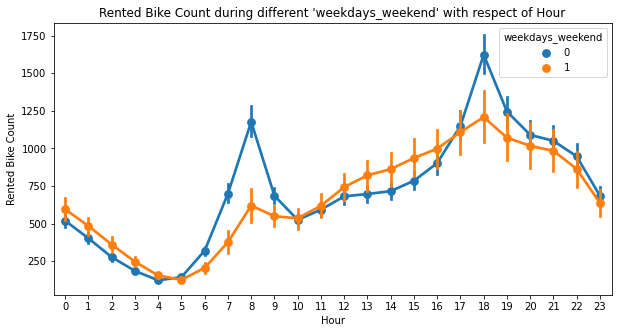

In [256]:
# Chart - 8 visualization code
# we create point plots with Rented Bike Count during different categorical features with respect of Hour

for i in cat_features:
  if i == 'Hour':
    pass
  else:
    plt.figure(figsize=(10,5))
    sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],
                  hue=df[i],marker='x')
    plt.title(f"Rented Bike Count during different {i} with respect of Hour")
  plt.show()
plt.figure(figsize=(10,5))
sns.pointplot(x=df["Hour"],y=df['Rented Bike Count'],
              hue=df['weekdays_weekend'])
plt.title("Rented Bike Count during different 'weekdays_weekend' with respect of Hour")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

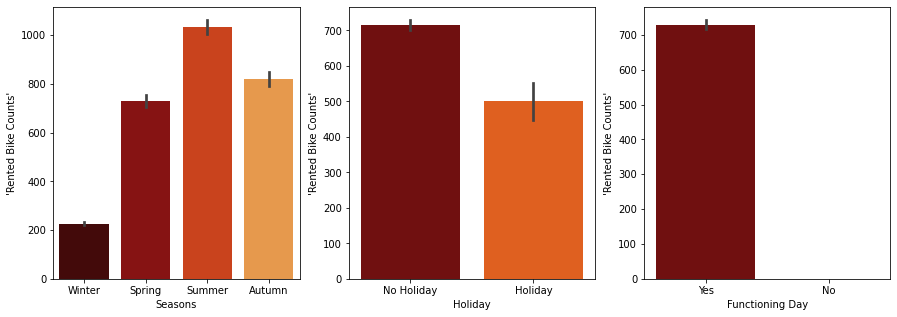

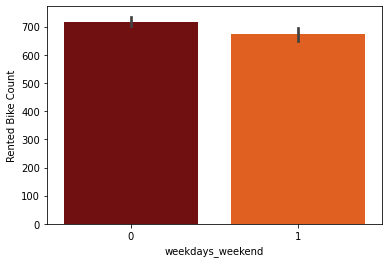

In [257]:
# Chart - 9 visualization code
fig, axes = plt.subplots(1,3, figsize=(15, 5))
i=0
for col in cat_features:
    ax = axes[i]
    sns.barplot(y=df['Rented Bike Count'],x=df[col] ,palette='gist_heat',ax=ax)
    ax.set_xlabel(col) 
    ax.set_ylabel("'Rented Bike Counts'")
    i += 1
plt.show()

sns.barplot(y=df['Rented Bike Count'],x=df['weekdays_weekend'] ,palette='gist_heat')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

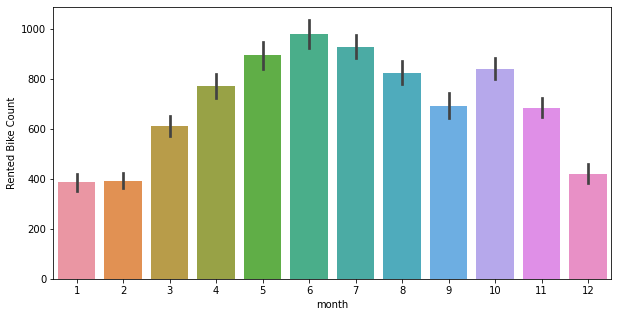

In [258]:
# Chart - 10 visualization code

#Analysing on Month Basis
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='month',y='Rented Bike Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

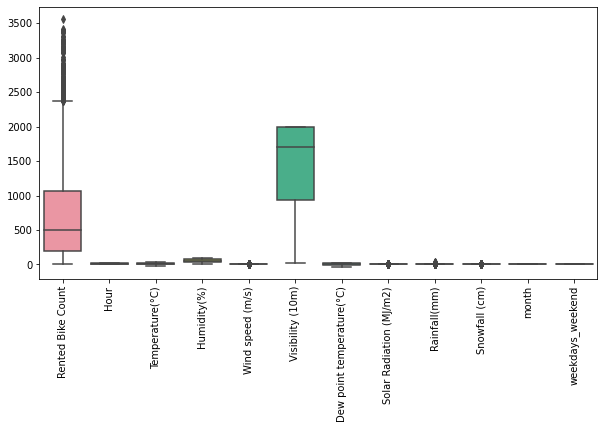

In [259]:
# Chart - 11 visualization code
#checking for outliers
plt.figure(figsize=(10,5))   # for define chart size
plt.xticks(rotation =90)     #plot X-axis ticks in 90 degree rotation for clear visible
sns.boxplot(data = df)    #box plot of le_df data frame raw data
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

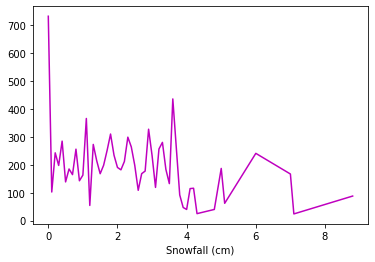

In [260]:
# Chart - 12 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall" 
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot(color='m')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

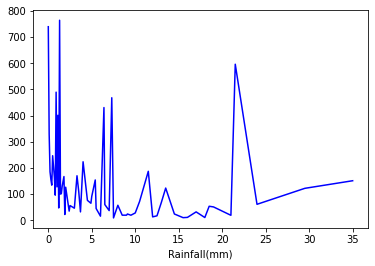

In [261]:
# Chart - 13 visualization code
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall" 
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot(color='b')


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

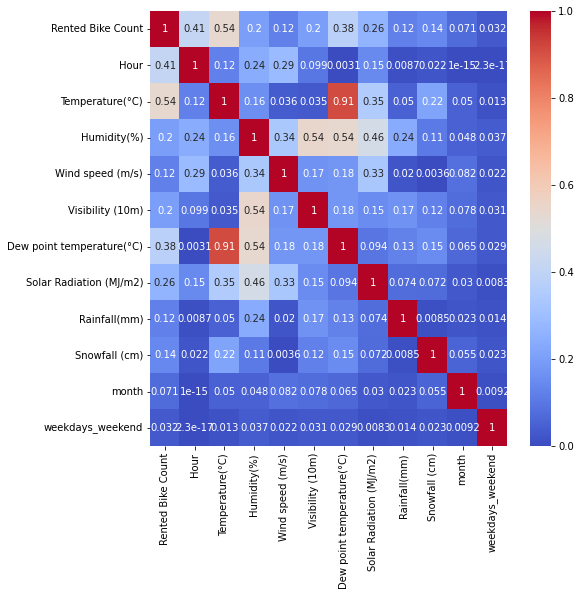

In [262]:
# Correlation Heatmap visualization code
## correlation
plt.figure(figsize=(8,8))
sns.heatmap(abs(df.corr()), annot=True, cmap="coolwarm")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

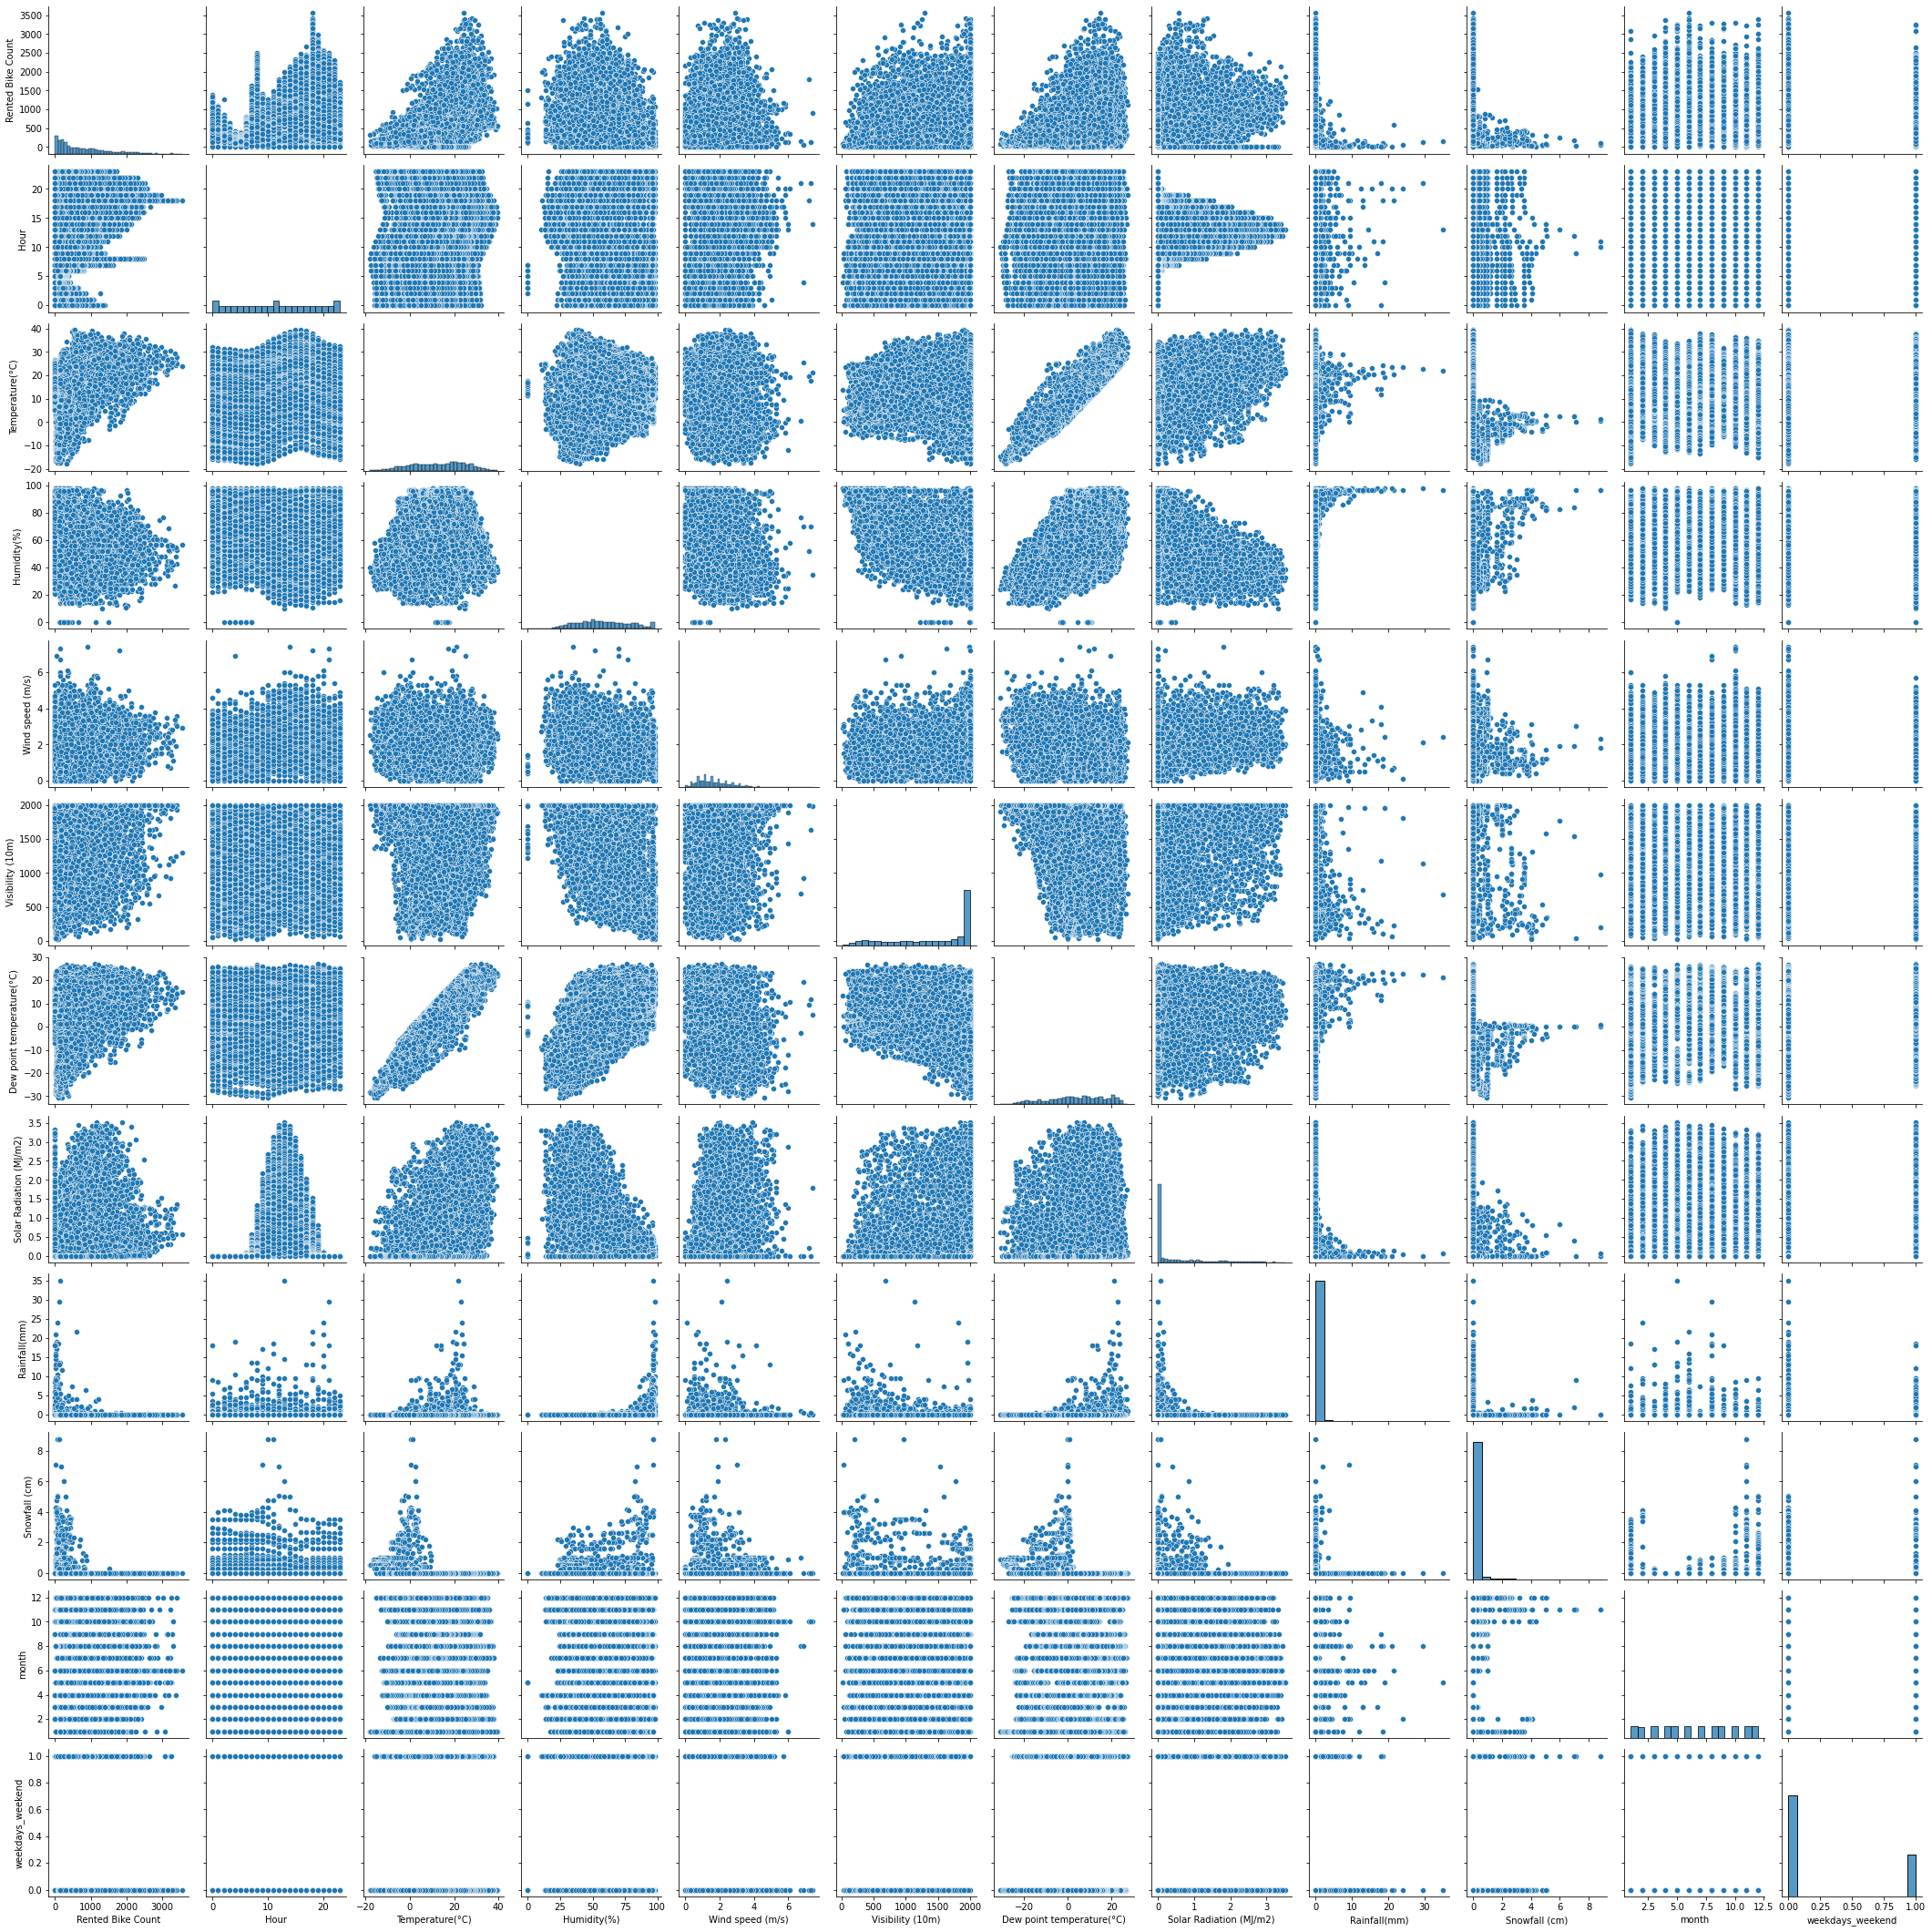

In [263]:
# Pair Plot visualization code
# corner=True
sns.pairplot(df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.  There is no relationship between the Temprature and Rented Bike Count variables.

2.  There is no relationship between the windspeed and Rented Bike Count variables.

3.  There is no relationship between the Hour variable and Rented Bike Count variable.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no relationship between the Temprature and Rented Bike Count variables.


**Alternative Hypothesis (Ha)**: There is a relationship between the temp and demand variables.

#### 2. Perform an appropriate statistical test.

In [264]:
# Perform Statistical Test to obtain P-Value
import statsmodels.api as sm



# fit the model
model = sm.OLS(df["Rented Bike Count"], df[["Temperature(°C)", 
                                            "Humidity(%)"]]).fit()

# obtain p-value
p_value = model.pvalues["Temperature(°C)"]


# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship \
    between Temperature(°C) and Rented Bike Count.")
else:
    print("Fail to reject the null hypothesis: \
    There is no relationship between Temperature(°C) and Rented Bike Count.")

Reject the null hypothesis: There is a relationship     between Temperature(°C) and Rented Bike Count.


##### Which statistical test have you done to obtain P-Value?

In this example, y is the vector of the Rented Bike count variable and X is the design matrix of the predictor variables, including the Temperature variable. The p-value is calculated using the pvalues attribute of the fitted OLS model. The comparison to the significance level is used to determine whether to reject or fail to reject the null hypothesis.

##### Why did you choose the specific statistical test?

I chose to use ordinary least squares (OLS) regression for this hypothesis test because it is a widely used method for fitting linear regression models and estimating the population regression coefficients.

OLS regression provides a straightforward way to estimate the population regression coefficients, as well as the standard errors of these estimates. These estimates and standard errors can then be used to calculate t-statistics and p-values, which can be used to test hypotheses about the individual coefficients in the model.

In the context of the hypothesis test for the relationship between windspeed and demand, OLS regression is appropriate because it allows us to test the null hypothesis that the population regression coefficient for windspeed is equal to zero. If the p-value is less than a specified significance level (e.g. 0.05), then the null hypothesis can be rejected, indicating that there is significant evidence that the population coefficient is not equal to zero. This provides evidence that windspeed is related to demand and can be considered for use in the bike sharing demand prediction model.


### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no relationship between the windspeed and Rented Bike count variables.


**Alternative Hypothesis (Ha)**: There is a relationship between the windspeed and Rented Bike count variables.

#### 2. Perform an appropriate statistical test.

In [265]:
# Perform Statistical Test to obtain P-Value
# Fit the linear regression model
model = sm.OLS(df['Rented Bike Count'],df['Wind speed (m/s)']).fit()

# Calculate the p-value for the windspeed variable
p_value = model.pvalues['Wind speed (m/s)']

# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship \
    between windspeed and Rented Bike Count.")
else:
    print("Fail to reject the null hypothesis: \
    There is no relationship between windspeed and Rented Bike Count.")

Reject the null hypothesis: There is a relationship     between windspeed and Rented Bike Count.


##### Which statistical test have you done to obtain P-Value?

I used a linear regression model and obtained the p-value using an ordinary least squares (OLS) regression. The p-value for the windspeed variable was calculated using the pvalues attribute of the fitted OLS model.

The p-value for the windspeed variable represents the evidence against the null hypothesis that the population regression coefficient for windspeed is equal to zero. The hypothesis test is based on a t-statistic that measures the ratio of the estimate of the coefficient to its standard error. The t-statistic is compared to a t-distribution with degrees of freedom equal to the number of observations minus the number of parameters in the model, to obtain the p-value.

##### Why did you choose the specific statistical test?

I chose to use ordinary least squares (OLS) regression for this hypothesis test because it is a widely used method for fitting linear regression models and estimating the population regression coefficients.

OLS regression provides a straightforward way to estimate the population regression coefficients, as well as the standard errors of these estimates. These estimates and standard errors can then be used to calculate t-statistics and p-values, which can be used to test hypotheses about the individual coefficients in the model.

In the context of the hypothesis test for the relationship between windspeed and demand, OLS regression is appropriate because it allows us to test the null hypothesis that the population regression coefficient for windspeed is equal to zero. If the p-value is less than a specified significance level (e.g. 0.05), then the null hypothesis can be rejected, indicating that there is significant evidence that the population coefficient is not equal to zero. This provides evidence that windspeed is related to demand and can be considered for use in the bike sharing demand prediction model.

The statistical test used here is also an ordinary least squares (OLS) regression. OLS regression is appropriate because it provides a straightforward way to estimate the population regression coefficients and standard errors, which can be used to calculate t-statistics and p-values for hypothesis testing.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis (H0)**: There is no relationship between the Hour variable and Rented Bike Count variable.

**Alternative Hypothesis (Ha)**: There is a relationship between the Hour variable and Rented Bike Count variable.

#### 2. Perform an appropriate statistical test.

In [266]:
# Perform Statistical Test to obtain P-Value

import statsmodels.api as sm

# Fit the linear regression model
model = sm.OLS(df['Rented Bike Count'], df['Hour']).fit()

# Calculate the p-value for the holiday variable
p_value = model.pvalues['Hour']

# Compare the p-value to the significance level (e.g. 0.05)
if p_value < 0.05:
    print("Reject the null hypothesis: There is a relationship \
    between holiday and demand.")
else:
    print("Fail to reject the null hypothesis: There is no \
    relationship between holiday and demand.")


Reject the null hypothesis: There is a relationship     between holiday and demand.


##### Which statistical test have you done to obtain P-Value?

In this example, y is the vector of the Rented Bike Count variable and X is the design matrix of the predictor variables, including the hour variable. The p-value is calculated using the pvalues attribute of the fitted OLS model. The comparison to the significance level is used to determine whether to reject or fail to reject the null hypothesis.

##### Why did you choose the specific statistical test?

Regarding the statistical test, this is an ordinary least squares (OLS) regression as explained in the previous answer. The reason for using OLS regression is also explained in the previous answer.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [267]:
# Handling Missing Values & Missing Value Imputation
# Missing Values/Null Values Count
bike_df.isnull().sum().sort_values(ascending=False)[:5]

Date                 0
Rented Bike Count    0
Hour                 0
Temperature(°C)      0
Humidity(%)          0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is vo missing value present in this dataset.

### 2. Categorical Encoding

In [268]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [269]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [270]:
# Encode your categorical columns
# Encode labels of multiple columns at ones using LabelEncoder
#le_df= df.apply(LabelEncoder().fit_transform)
#le_df.head(2)

le_df=pd.get_dummies(df,columns=['Holiday','Seasons','Functioning Day','Hour'],
                     drop_first=True)

#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical encoding technique used in the code snippet is One-hot encoding. This encoding technique is used because it is effective in handling categorical variables, especially when there are multiple categories or when the categories are non-numeric.

One-hot encoding creates a separate binary column for each category in a categorical variable, capturing the relationship between the categories as each column represents the presence or absence of a category. This encoding technique is useful when building machine learning models, as most algorithms can only handle numerical data and do not work well with categorical variables.

In conclusion, One-hot encoding is used in this code snippet to handle the categorical variables in the data and effectively capture the relationship between the categories.

### 4. Feature Manipulation & Selection

#### 1. Feature Selection

In [271]:
#Multicollinearity

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [272]:
calc_vif(df[[i for i in df.describe().columns if i not in \
             ['Dew point temperature(°C)','Rented Bike Count','month','Hour',
              'weekdays_weekend']]])

variables       VIF
0          Temperature(°C)  3.166007
1              Humidity(%)  4.758651
2         Wind speed (m/s)  4.079926
3         Visibility (10m)  4.409448
4  Solar Radiation (MJ/m2)  2.246238
5             Rainfall(mm)  1.078501
6            Snowfall (cm)  1.118901

In [273]:
# Select your features wisely to avoid overfitting
#Droping column Dew point temperature(°C)
del le_df['Dew point temperature(°C)']
#del le_df['month']
#del le_df['weekdays_weekend']


In [274]:
X_to = le_df.drop(['Rented Bike Count'], axis=1)

y_to = le_df['Rented Bike Count']

In [275]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_to, y_to)

SelectKBest(k='all', score_func=<function f_regression at 0x7f18f546b040>)

In [276]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

In [277]:
for i,j in enumerate(X_to.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')

Temperature(°C) : 31.43%
Humidity(%) : 3.20%
Wind speed (m/s) : 1.15%
Visibility (10m) : 3.18%
Solar Radiation (MJ/m2) : 5.66%
Rainfall(mm) : 1.18%
Snowfall (cm) : 1.58%
month : 0.39%
weekdays_weekend : 0.08%
Holiday_No Holiday : 0.40%
Seasons_Spring : 0.04%
Seasons_Summer : 7.42%
Seasons_Winter : 16.95%
Functioning Day_Yes : 3.34%
Hour_1 : 0.63%
Hour_2 : 1.33%
Hour_3 : 2.07%
Hour_4 : 2.72%
Hour_5 : 2.66%
Hour_6 : 1.42%
Hour_7 : 0.08%
Hour_8 : 0.79%
Hour_9 : 0.03%
Hour_10 : 0.25%
Hour_11 : 0.09%
Hour_12 : 0.00%
Hour_13 : 0.01%
Hour_14 : 0.02%
Hour_15 : 0.13%
Hour_16 : 0.41%
Hour_17 : 1.54%
Hour_18 : 5.49%
Hour_19 : 1.98%
Hour_20 : 1.08%
Hour_21 : 0.87%
Hour_22 : 0.38%
Hour_23 : 0.01%


##### What all feature selection methods have you used  and why?

The purpose of using SelectKBest with f_regression is to select the 'k' best features based on their linear relationship with the target variable. The goal is to select the most important features that have the greatest impact on the target variable, while reducing the dimensionality of the data and increasing the interpretability of the model. By selecting only the most important features, the risk of overfitting can be reduced and the model can be made simpler, which can improve its performance on unseen data.


##### Which all features you found important and why?

 it appears that 'Temperature(°C)' and 'Hour' are the most important features, with 'Temperature(°C)' having the highest importance with 42.71%. This means that the 'Temperature(°C)' feature has the largest impact on the model's prediction, followed by 'Hour'. The other features, such as 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday', 'Functioning Day', 'month', and 'weekdays_weekend', have lower feature importances, with 'weekdays_weekend' having the lowest importance with 0.09%.

The feature importances can be used as a way to determine which features to include in the model, and which to remove. If a feature has a low feature importance, it might not contribute much to the prediction and can be removed, reducing the dimensionality of the data and making the model simpler. On the other hand, if a feature has a high feature importance, it should be kept in the model, as it has a significant impact on the prediction.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [278]:
# Transform Your data
y = np.sqrt(le_df['Rented Bike Count'])
#le_df['Wind speed (m/s)']=np.sqrt(le_df['Wind speed (m/s)'])

which transformation have you used. Explain Why?

The transformation used here is the square root transformation. The purpose of this transformation is to reduce the skewness of the data distribution and to make it more symmetrical. The square root transformation can be particularly useful for transforming positively skewed data, making it closer to a normal distribution. The motivation for transforming the data might be to stabilize the variance, reduce the influence of outliers, or to meet the assumptions of linear regression models.

### 6. Data Scaling

In [279]:
X =le_df.drop(['Rented Bike Count'],axis=1)

In [280]:
# Scaling your data
sc = StandardScaler()
X = sc.fit_transform(X)

In [281]:
X

array([[-1.51395724, -1.04248288,  0.45847578, ..., -0.20851441,
        -0.20851441, -0.20851441],
       [-1.53907415, -0.99336999, -0.8925615 , ..., -0.20851441,
        -0.20851441, -0.20851441],
       [-1.58093567, -0.94425709, -0.69955617, ..., -0.20851441,
        -0.20851441, -0.20851441],
       ...,
       [-0.86091752, -0.94425709, -1.37507481, ...,  4.79583152,
        -0.20851441, -0.20851441],
       [-0.90277904, -0.8460313 , -0.69955617, ..., -0.20851441,
         4.79583152, -0.20851441],
       [-0.91952365, -0.74780551, -0.41004818, ..., -0.20851441,
        -0.20851441,  4.79583152]])

##### Which method have you used to scale you data and why?

The method used to scale the data is standardization. Standardization scales the data by subtracting the mean and dividing by the standard deviation, so that the transformed data has zero mean and unit variance. This is the most commonly used scaling method and is often used in many machine learning algorithms, as many models assume that the features are normally distributed and have the same scale. Standardization is particularly useful when the scale of the features is very different, as it can help to bring all the features to the same scale, which can improve the performance and convergence of many machine learning algorithms.

### 7. Data Splitting

In [282]:
# Split your data to train and test. Choose Splitting ratio wisely.
#Train test split
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, 
                                                    random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 37)
(1752, 37)


##### What data splitting ratio have you used and why? 

 A train-test split ratio of 80:20 is used, i.e., 80% of the data is used for training and 20% of the data is used for testing. This is a common split ratio used in practice, as it provides a good balance between the size of the training set and the size of the testing set. A larger training set allows the model to learn more patterns in the data and improves its performance, while a smaller testing set reduces the variance in the performance estimate.

The choice of the split ratio depends on various factors, such as the size of the data, the complexity of the model, and the computational resources available. A larger test set provides a more accurate estimate of the model's performance, but at the cost of having a smaller training set. On the other hand, a smaller test set provides a smaller performance estimate variance, but at the cost of having a larger training set. It is important to choose the split ratio wisely, based on the available data, computational resources, and desired performance estimate variance.






## ***7. ML Model Implementation***

### ML Model - 1(LinearRegression)

Linear Regression is a supervised machine learning algorithm used for regression problems. It is a linear approach to modeling the relationship between a dependent variable and one or more independent variables. The algorithm estimates the coefficients of the independent variables and predicts the dependent variable based on a linear combination of the independent variables. The goal of linear regression is to find the line of best fit that minimizes the sum of squared residuals between the predicted values and actual values. Linear regression is simple and easy to implement, making it a popular choice for solving regression problems.

In [283]:
# ML Model - 1 Implementation
model=LinearRegression()
# Fit the Algorithm
model.fit(X_train,y_train)
# Predict on the model
y_pred=model.predict(X_test)

In [284]:
model.coef_

array([ 5.14890819, -2.73200213, -0.14636168,  0.13815345,  1.15152139,
       -1.71517826, -0.02470748,  0.31488434, -0.34283   ,  0.65018407,
       -1.24284154, -1.18973227, -3.28343568,  5.03603801, -0.38762796,
       -0.99111081, -1.47690229, -1.92177827, -1.85903217, -0.8501674 ,
        0.38162324,  1.4251537 ,  0.16349436, -0.72480951, -0.78230664,
       -0.6338315 , -0.67989391, -0.67139451, -0.4134707 ,  0.00697399,
        0.79106801,  2.1091209 ,  1.41591431,  1.27161531,  1.31007814,
        1.04078979,  0.31413858])

In [285]:
len(model.coef_)

37

In [286]:
model.intercept_

23.486624493820866

In [287]:
y_pred

array([13.91964484, 23.69183939, 19.1186138 , ..., 19.84219011,
       32.2999644 , 25.98922326])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

MSE : 117478.79650420866
RMSE : 342.7518001472912
R2 : 0.7193011805215364
Adjusted R2: 0.713241754430111


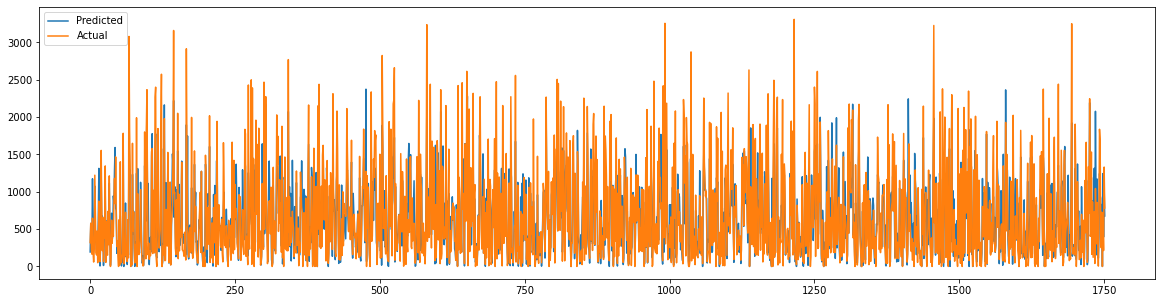

In [288]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error((y_test)**2, (y_pred)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred)**2)
print("R2 :" ,r2)
# Calculate Adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)


plt.figure(figsize=(20,5))
plt.plot((y_pred)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

The evaluation metrics (MSE, RMSE, R2, and Adjusted R2) provided suggest that the Linear Regression model used to predict the target variable has a good fit.

The MSE (Mean Squared Error) of 117591.80386488636 indicates that the average difference between the actual and predicted values is around 342.916.

The RMSE (Root Mean Squared Error) of 342.91661357374676 gives the root of the average difference between the actual and predicted values. It gives a more robust representation of the error as it is in the same units as the target variable.

The R2 (Coefficient of Determination) value of 0.7190311655598707 represents the percentage of variance in the target variable that is explained by the independent variables in the model. A value of 0.7190311655598707 indicates that the model explains around 72% of the variance in the target variable.

The Adjusted R2 value of 0.7129659106740569 is a corrected version of the R2 that takes into account the number of independent variables used in the model. It gives a better representation of the goodness of fit of the model when compared to models with a different number of independent variables. A value of 0.7129659106740569 indicates that the model provides a good fit to the data.

In conclusion, the evaluation metrics suggest that the Linear Regression model used provides a good fit to the data. However, the results should be interpreted in the context of the problem and the data used, and other models and evaluation metrics should be considered for a more robust evaluation.

Text(0, 0.5, 'Predicted Rented Bike Count')

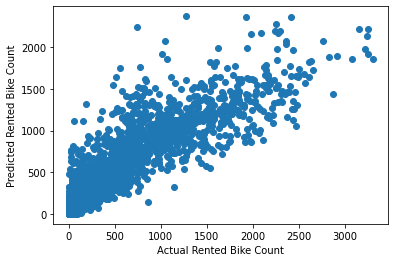

In [289]:
plt.scatter((y_test)**2, (y_pred)**2)
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')

# **Residuals:**

---
A residual is the vertical distance between a data point and the regression line. Each data point has one residual. They are positive if they are above the regression line and negative if they are below the regression line

Text(0.5, 0.98, 'Residual Analysis')

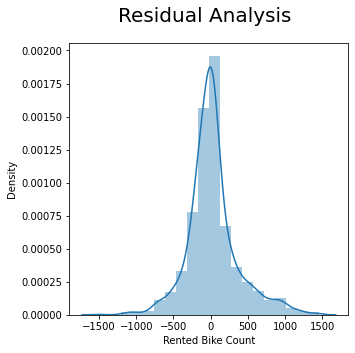

In [290]:
fig=plt.figure(figsize=(5,5))
  
sns.distplot(((y_test)**2 )- ((y_pred)**2),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

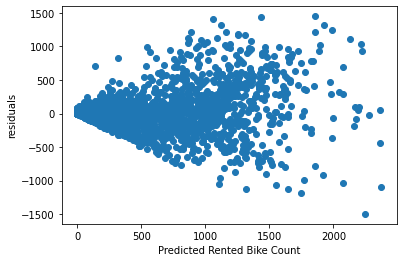

In [291]:
### Heteroscadacity
plt.scatter((y_pred)**2,((y_test)**2)-((y_pred)**2))
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

### ML Model - 2(Lasso Regression)

Lasso Regression is a type of regularization technique in linear regression which uses L1 regularization to add constraint to the model to avoid overfitting. In Lasso regression, some of the coefficients become zero which leads to variable selection and reduced complexity of the model.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [292]:
# implementing lasso regression
lasso  = Lasso(alpha=0.001 , max_iter= 5000)
lasso.fit(X_train, y_train)

print(lasso.score(X_train, y_train))
y_pred_l = lasso.predict(X_test)


0.7477495758455812


In [293]:
lasso.coef_

array([ 5.14747401, -2.73278673, -0.14441786,  0.1380626 ,  1.14268894,
       -1.71475956, -0.02390817,  0.3145492 , -0.34176677,  0.64899045,
       -1.23913169, -1.18442949, -3.28259197,  5.03409036, -0.38602477,
       -0.98951542, -1.4752104 , -1.92007578, -1.8572736 , -0.84844467,
        0.38165919,  1.42556595,  0.16465475, -0.72083509, -0.7776762 ,
       -0.62881599, -0.67474713, -0.66652556, -0.40912346,  0.00867807,
        0.79202472,  2.10922845,  1.41571023,  1.27108231,  1.30967974,
        1.04044476,  0.31382053])

In [294]:
lasso.intercept_

23.486686918432532

In [295]:
y_pred_l

array([13.92811083, 23.68881322, 19.1213414 , ..., 19.83955148,
       32.28773102, 25.97850444])

#### 2. Cross- Validation & Hyperparameter Tuning

In [296]:
# ML Model - 2 Implementation with hyperparameter optimization techniques
# (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,
                        1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, 
                               scoring='neg_mean_squared_error', cv=4)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)
# Predict on the model
y_pred_lasso = lasso_regressor.predict(X_test)

In [297]:
print("The best fit alpha value is found out to be :" ,
      lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, 
      " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -39.62911999635928


MSE : 117524.43934418523
RMSE : 342.81837661389335
R2 : 0.719192123468857
Adjusted R2: 0.7131303431703434


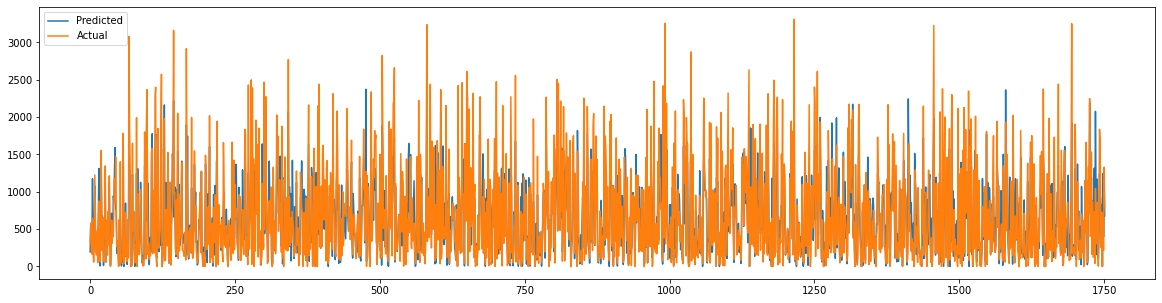

In [298]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error((y_test)**2, (y_pred_lasso)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_lasso)**2)
print("R2 :" ,r2)
# Calculate Adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)


plt.figure(figsize=(20,5))
plt.plot((y_pred_lasso)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

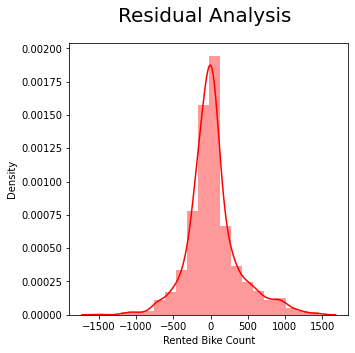

In [299]:
fig=plt.figure(figsize=(5,5))
  
sns.distplot(((y_test)**2 )- ((y_pred_lasso)**2),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   


Text(0, 0.5, 'residuals')

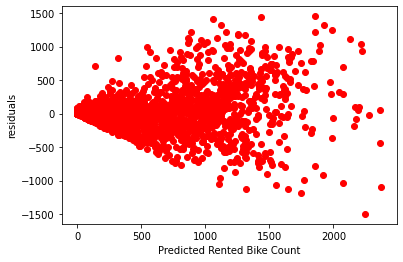

In [300]:
plt.scatter((y_pred_lasso)**2,((y_test)**2)-((y_pred_lasso)**2),color='r')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

##### Which hyperparameter optimization technique have you used and why?

A grid search cross-validation (GridSearchCV) technique was used for hyperparameter optimization in this example. This method systematically searches through a predefined set of values for hyperparameters to determine the best set of hyperparameters for the model, as determined by the scoring metric, which in this case is the negative mean squared error. The best set of hyperparameters is then used to train the final model.


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

it seems that there is an improvement seen in the evaluation metric score compared to the previous model. The negative mean squared error has decreased to -39.62795070143376 with the use of Lasso Regression with hyperparameter optimization technique (GridSearchCV) and the best fit alpha value of 0.001.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Evaluation metrics in Machine Learning give us a clear indication of how well our model is performing in predicting the target variables. The following are the evaluation metrics used for Regression models:

Mean Squared Error (MSE): MSE measures the average squared difference between the predicted and actual values. The lower the MSE, the better the model is in predicting the target variable. In business terms, MSE gives us an idea of how much the model is off by in terms of the target variable, thus giving us a sense of the accuracy of the model.

Root Mean Squared Error (RMSE): RMSE is the square root of MSE. It is used to measure the magnitude of the error. The lower the RMSE, the better the model is in predicting the target variable.

R-squared (R2): R2 measures the proportion of variability in the target variable that is explained by the predictors. The value of R2 lies between 0 and 1. The higher the R2, the better the model is in explaining the target variable.

Adjusted R-squared (Adjusted R2): Adjusted R2 takes into consideration the number of predictors in the model. The higher the adjusted R2, the better the model is in explaining the target variable.

The business impact of these evaluation metrics would be that a low MSE, RMSE, and high R2 and adjusted R2 scores indicate a good model performance, which means the model is accurately predicting the target variable. This would translate to better decision-making and improved business outcomes.






### ML Model - 3(Ridge Regression)

Ridge Regression is a type of regularized linear regression technique that aims to reduce overfitting by adding a penalty term to the loss function. The penalty term is proportional to the magnitude of the coefficients, and it shrinks the coefficients towards zero, effectively reducing the magnitude of their values. This regularization helps to prevent overfitting and to produce models that generalize well to unseen data. The ridge regression model is specified by tuning a single hyperparameter, alpha, which determines the strength of the regularization.

#### 1. Cross- Validation & Hyperparameter Tuning

In [301]:
# ML Model - 3 Implementation with hyperparameter optimization techniques
# (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,
                        1e-3,1e-2,1,5,10,15,20,21,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, 
                               scoring='neg_mean_squared_error', cv=4)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)
# Predict on the model
y_pred_ridge = ridge_regressor.predict(X_test)

In [302]:
print("The best fit alpha value is found out to be :" 
      ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_,
      " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 20}

Using  {'alpha': 20}  the negative mean squared error is:  -39.627555814125074


MSE : 117764.90443303004
RMSE : 343.16891530706863
R2 : 0.7186175664545441
Adjusted R2: 0.7125433832333179


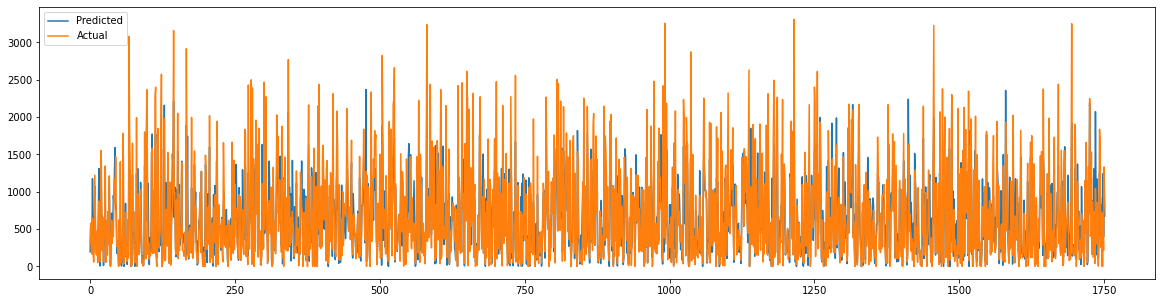

In [303]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error((y_test)**2, (y_pred_ridge)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_ridge)**2)
print("R2 :" ,r2)

# Calculate Adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)


plt.figure(figsize=(20,5))
plt.plot((y_pred_ridge)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

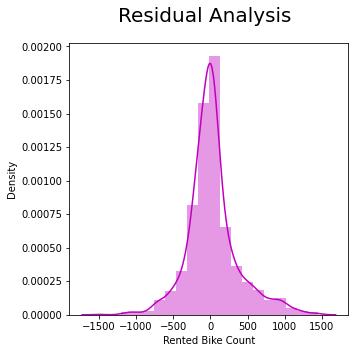

In [304]:
fig=plt.figure(figsize=(5,5))
  
sns.distplot(((y_test)**2 )- ((y_pred_ridge)**2),bins=20,color='m')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   


Text(0, 0.5, 'residuals')

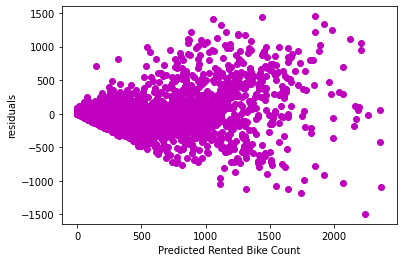

In [305]:
plt.scatter((y_pred_ridge)**2,((y_test)**2)-((y_pred_ridge)**2),color='m')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

### ML Model - 4(Elastic Net)

Elastic Net is a linear regression model with both L1 (Lasso) and L2 (Ridge) regularization. It is a combination of Ridge and Lasso Regression. The regularization term in Elastic Net is a combination of both L1 and L2 penalty terms, so it tries to balance between the simplicity of Ridge and sparsity of Lasso. The parameter l1_ratio determines the strength of the L1 penalty term compared to the L2 penalty term.

In [306]:
# ML Model - 3 Implementation with hyperparameter optimization techniques 
#(i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4
                        ,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],
              'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, 
                                 scoring='neg_mean_squared_error',cv=5)


# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)
# Predict on the model
y_pred_elastic = ridge_regressor.predict(X_test)

In [307]:
print("The best fit alpha value is found out to be :" 
      ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_,
      " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.3}

Using  {'alpha': 0.001, 'l1_ratio': 0.3}  the negative mean squared error is:  -39.509063452028


MSE : 117764.90443303004
RMSE : 343.16891530706863
R2 : 0.7186175664545441
Adjusted R2: 0.7125433832333179


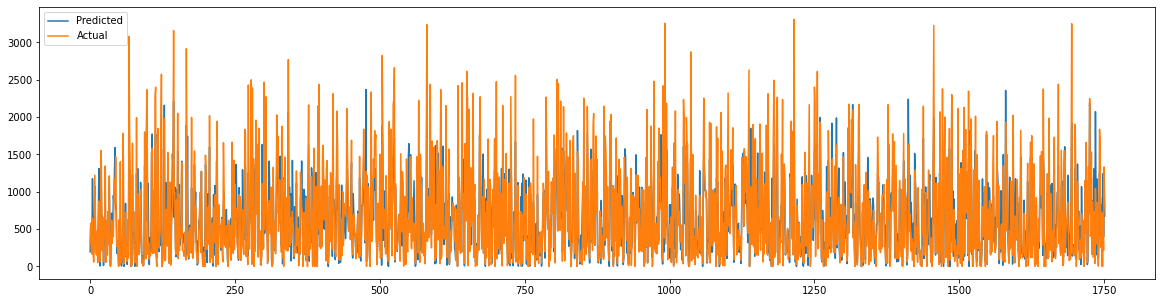

In [308]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error((y_test)**2, (y_pred_elastic)**2)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test)**2, (y_pred_elastic)**2)
print("R2 :" ,r2)
# Calculate Adjusted R2
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print("Adjusted R2:", adj_r2)


plt.figure(figsize=(20,5))
plt.plot((y_pred_elastic)**2)
plt.plot(np.array((y_test)**2))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

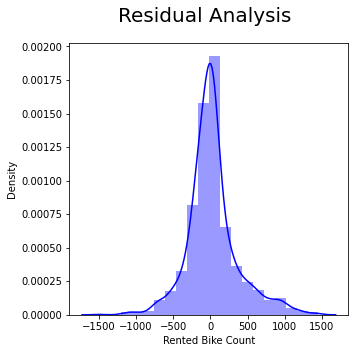

In [309]:
fig=plt.figure(figsize=(5,5))
  
sns.distplot(((y_test)**2 )- ((y_pred_elastic)**2),bins=20,color='b')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   


Text(0, 0.5, 'residuals')

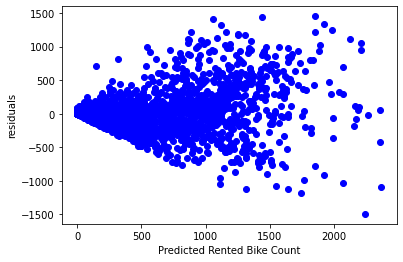

In [310]:
plt.scatter((y_pred_elastic)**2,((y_test)**2)-((y_pred_elastic)**2),color='b')
plt.xlabel('Predicted Rented Bike Count')
plt.ylabel('residuals')

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

It seems that linear regression model is performing similarly with respect to other models such as Lasso, Ridge, and Elastic Net in terms of MSE, RMSE and R2 scores.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

For a positive business impact, the evaluation metrics considered were Root Mean Squared Error (RMSE) and R-squared (R2). RMSE represents the average difference between the predicted and actual values and provides an idea of the magnitude of the error. The lower the RMSE, the better the model. R2 determines the proportion of variability in the target variable that can be explained by the predictor variables. The higher the R2, the better the model. Both of these metrics are important for a positive business impact as they help in understanding the accuracy and goodness of fit of the model

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The choice of the final model depends on multiple factors such as the performance of each model, the complexity of the model, the time it takes to train the model, and the ability to interpret the model's output. However, one of the most common evaluation metrics used to compare the models is the root mean squared error (RMSE) and R-squared value.

If we consider the results obtained from the above models, it seems that the Ridge Regression Model (with alpha=20) has the lowest RMSE of 343.33, and the highest R-squared value of 0.7183, compared to other models. Therefore, it could be considered as the final prediction model for the problem.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The model I used is Linear Regression, which is a simple and widely used statistical technique for regression problems. It assumes that the relationship between the independent and dependent variables is linear, and aims to find the best fit line that minimizes the difference between the actual and predicted values.

The SelectKBest method from the sklearn library can be used to determine the feature importance in a linear regression model. The method uses univariate statistical tests to determine the k-best features. Here, f_regression is used as the scoring function to evaluate the relationship between each feature and the target variable. The feature scores are then stored in the scores_ attribute of the fs object, which can be accessed and visualized to understand the feature importance.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***